# Training a Neural Network for Hand Written Digit classification

# Here we'll use Mnist data from keras only

In [3]:
#!pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as ps
import numpy as np


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [36]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [38]:
# x_train[1] # 28*28 array representing a number - and our x_train has 60000 such arrays

# 0 means black
# 255 means white

In [39]:
# x_train[1].flatten() # converting a multidimensional array to 1-D array

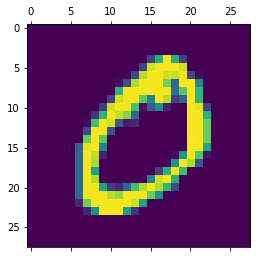

In [40]:
plt.matshow(x_train[1]) # it is telling that element at 1st position is 0

In [41]:
y_train[1]

0

In [42]:
# scaling - by diving each value by 255 to convert it into the range of 0 and 1

x_train = x_train/255
x_test = x_test/255

In [43]:
# we need to flatten our dataset - connvert it to 1-d array, so that we can feed to neural network
# basically we want x_train from (60000,28,28) to (60000, 784) and x_test from (10000,28,28) to (10000, 784)


x_train_flattened = x_train.reshape(len(x_train),28*28)
print(x_train_flattened.shape)

x_test_flattened = x_test.reshape(len(x_test), 28*28)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [44]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation = 'sigmoid')) # input layer, it needs 784 inputs (28*28)

model.summary()

In [47]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 975us/step - loss: 0.4691 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2670 - accuracy: 0.9262


In [48]:
model.get_weights()

[array([[-0.08281033, -0.00470384,  0.05335299, ...,  0.06857916,
          0.08217358,  0.05955005],
        [ 0.05182739,  0.07675668,  0.04033259, ..., -0.01843104,
          0.02299515,  0.01615961],
        [-0.00995994, -0.04206404,  0.08402821, ..., -0.07273829,
         -0.03411334,  0.0701055 ],
        ...,
        [-0.05373479, -0.08094475, -0.04438893, ...,  0.07445381,
          0.01210499,  0.01022771],
        [-0.03217867,  0.07290974,  0.05823513, ...,  0.02350795,
         -0.04982129, -0.02962809],
        [ 0.0514963 ,  0.04669496, -0.04324082, ..., -0.01491438,
         -0.02917473, -0.00449485]], dtype=float32),
 array([-0.35354108,  0.47718495,  0.08318609, -0.27520636,  0.08335594,
         0.897138  , -0.08666515,  0.48057657, -1.0321872 , -0.20085901],
       dtype=float32)]

In [50]:
model.evaluate(x_test_flattened, y_test)

# giving good accuracy on test data as well

313/313 [==============================] - 0s 866us/step - loss: 0.2657 - accuracy: 0.9261


[0.2657131850719452, 0.9261000156402588]

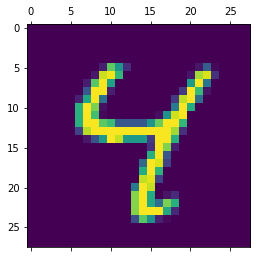

In [51]:
plt.matshow(x_test[6])

In [53]:
# let's predict and confirm through our model as well

y_predict_test = model.predict(x_test_flattened)
y_predict_test # this is the prediction on whole x_test

313/313 [==============================] - 0s 800us/step


array([[1.8860320e-02, 2.8379836e-07, 6.6278227e-02, ..., 9.9980134e-01,
        1.0166750e-01, 5.7553774e-01],
       [3.6103782e-01, 5.4001063e-03, 9.9940747e-01, ..., 9.7580115e-13,
        1.5681134e-01, 1.7033547e-09],
       [2.7998880e-04, 9.9180579e-01, 6.5766990e-01, ..., 1.0860042e-01,
        3.4748045e-01, 3.4583911e-02],
       ...,
       [2.1931605e-06, 3.1562483e-06, 1.7868000e-03, ..., 2.7883229e-01,
        5.4673028e-01, 7.4611193e-01],
       [8.3584870e-05, 1.2723630e-04, 2.7167707e-04, ..., 3.2177846e-05,
        6.2978774e-01, 9.5547672e-05],
       [6.7421948e-03, 1.1129339e-09, 3.7698457e-01, ..., 2.4824315e-08,
        3.3117158e-04, 1.1926953e-06]], dtype=float32)

In [55]:
y_predict_test[6] # we see 10 numbers here as it's showing probablity of the given input for each digit from 0-9 
# and we see that value at index 4 (starting from 0) is maximum, so basically the given input was 4

array([5.4599013e-04, 5.2956173e-05, 2.6263692e-04, 3.1530835e-02,
       9.9553090e-01, 4.9802521e-01, 7.9194019e-03, 2.1195468e-01,
       7.8217191e-01, 6.3885343e-01], dtype=float32)

In [57]:
np.argmax(y_predict_test[6])

4

In [63]:
# we did this because our y_predict_test has 10 values and that too integer whereas our y_test is purely a digit, to create a 
# confusion matrix we need to compare them, so y_predict_test must be a integer
# so we are extracting the value from y_predict_test



y_predicted_labels = [np.argmax(i) for i in y_predict_test]
y_predicted_labels[:20]

# like this y_predicted_labels is telling each digit in test data

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [65]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=uint8)

In [67]:
# we can clearly see in above 2 cells that y_predicted_labels(predicted values) and y_test(actual values) are same

In [64]:
# confusion matrix

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    7,    2,    2,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    7,  937,   14,    7,    3,   12,   10,   36,    3],
       [   2,    0,   24,  919,    0,   22,    2,   12,   24,    5],
       [   1,    1,    9,    2,  906,    0,    9,    4,   13,   37],
       [   9,    2,    7,   33,    8,  771,   12,    9,   34,    7],
       [  11,    3,   10,    1,    7,   10,  910,    2,    4,    0],
       [   1,    5,   25,    4,    6,    0,    0,  961,    3,   23],
       [   4,    7,    8,   17,    9,   23,    8,   12,  880,    6],
       [   8,    7,    2,   11,   23,    5,    0,   31,   14,  908]])>

Text(33.0, 0.5, 'Actual')

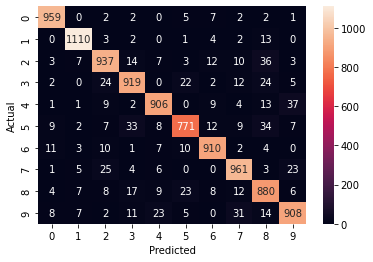

In [71]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Interpretation

- 959 times the actual label was 0 and the model also predicted it as 0
- 1110 times the actual label was 1 and the model also predicted it as 1
- 937 times the actual label was 2 but the model predicted 7 times as 1 and 3 times as 0
- 919 times the actual label was 3 but the model predicted 24 times as 2 and 2 times as 0
and so on

- Anything which is not in diagnol are errors

# Now let's try the similar neural network using Dense layers and see if accuracy improves

In [72]:
model1 = Sequential()
model1.add(Dense(128, input_dim=784, activation = 'relu'))
model1.add(Dense(10, activation = 'sigmoid'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [75]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - accuracy: 0.9258
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1149 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0802 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0600 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0471 - accuracy: 0.9852


# we see just by using the same neural network and same no of epochs, accuracy is decently improved. 


In [77]:
model1.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 634us/step - loss: 0.0737 - accuracy: 0.9774


[0.07366307079792023, 0.977400004863739]

313/313 [==============================] - 0s 521us/step


Text(69.0, 0.5, 'Truth')

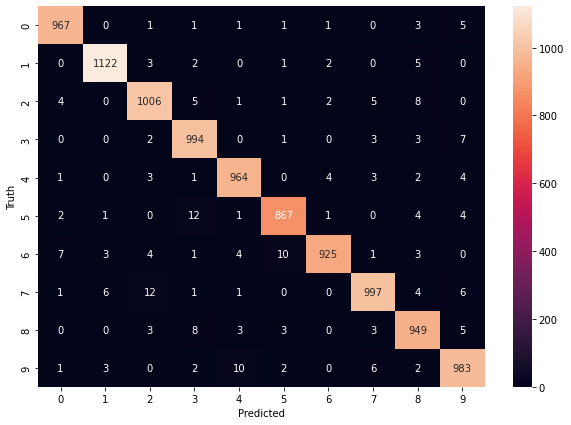

In [80]:
y_predicted_1 = model1.predict(x_test_flattened)
y_predicted_labels_1 = [np.argmax(i) for i in y_predicted_1]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_1)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# We can add Flatten layer using Keras if we don't want to use reshape on input data initially.
# Similarly we can add Normalize layer for scaling as well instead of dividing it with 255 initially

In [91]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [92]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.fit(x_train, y_train, epochs=5) # here we pass x_train as input which is unflattened

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2746 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1241 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 2s 977us/step - loss: 0.0882 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.0663 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 2s 998us/step - loss: 0.0522 - accuracy: 0.9840


In [93]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 0s 731us/step - loss: 0.0928 - accuracy: 0.9729


[0.09278729557991028, 0.9728999733924866]